### 220427 과제 2
#### 2. 유방암 데이터 - 차원축소, 군집화
- 10, 5, 2 차원으로 차원 축소
- 원본과 차원축소한 데이터의 분류(앙상블) 정확도 측정
- 군집화 하기
- 2차원으로 축소한 것은 시각화(오리지날, 군집 데이터)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()
cancer_std = StandardScaler().fit_transform(cancer.data)
cancer_std.shape


(569, 30)

- 차원 축소

In [12]:
def tr_pca(num):
    pca = PCA(num)
    cancer_pca = pca.fit_transform(cancer_std)
    return cancer_pca

In [17]:
from sklearn.decomposition import PCA
pca10 = tr_pca(10)
pca5 = tr_pca(5)
pca2 = tr_pca(2)
print(f'10차원:\n{pca10[0]}\n\n5차원:\n{pca5[0]}\n\n2차원:\n{pca2[0]}')

10차원:
[ 9.19283683  1.94858307 -1.12316616  3.6337309  -1.19511017  1.41142439
  2.15936965 -0.39840837 -0.15711612 -0.87738921]

5차원:
[ 9.19283683  1.94858307 -1.12316614  3.63373019 -1.19511128]

2차원:
[9.19283683 1.94858307]


- 원본

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, test_size=0.2, random_state=2022
)
rfc = RandomForestClassifier(random_state=2022)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

1.0

- 2차원

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    pca2, cancer.target, stratify=cancer.target, test_size=0.2, random_state=2022
)
rfc = RandomForestClassifier(random_state=2022)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9824561403508771

- 5차원

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    pca5, cancer.target, stratify=cancer.target, test_size=0.2, random_state=2022
)
rfc = RandomForestClassifier(random_state=2022)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9824561403508771

- 10차원

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    pca10, cancer.target, stratify=cancer.target, test_size=0.2, random_state=2022
)
rfc = RandomForestClassifier(random_state=2022)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9736842105263158

- 군집화

In [38]:
from sklearn.cluster import KMeans
pca = PCA(n_components=2)
cancer_pca = pca.fit_transform(cancer_std)

kmeans = KMeans(n_clusters=2, random_state=2022)
kmeans.fit(cancer_std)

df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df['target'] = cancer.target
df['cluster'] = kmeans.labels_
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,cluster
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,1


In [41]:
df = pd.DataFrame({
    'PC1': pca2[:,0], 'PC2': pca2[:,1],
    'target': cancer.target, 'cluster': kmeans.labels_
})
df.head()

,PC1,PC2,target,cluster
0,9.192837,1.948583,0,1
1,2.387802,-3.768172,0,1
2,5.733896,-1.075174,0,1
3,7.122953,10.275589,0,1
4,3.935302,-1.948072,0,1


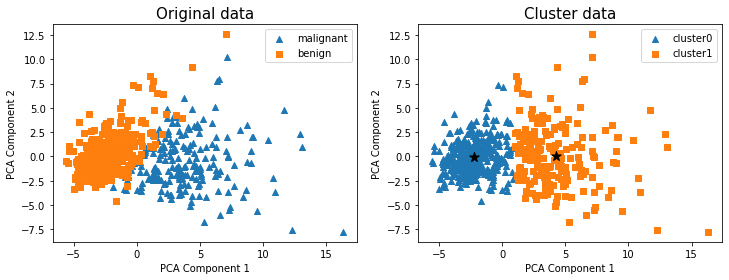

In [43]:
markers = ['^','s']

plt.figure(figsize=(12,4))

for k, column in enumerate(['target','cluster']):
    plt.subplot(1, 2, k+1)
    for i, marker in enumerate(markers):
        x_data = df[df[column] == i]['PC1']
        y_data = df[df[column] == i]['PC2']
        if k == 0:
            plt.title('Original data', fontsize=15)
            plt.scatter(x_data, y_data, marker=marker, label=cancer.target_names[i])
        else:
            plt.title('Cluster data', fontsize=15)
            plt.scatter(x_data, y_data, marker=marker, label='cluster'+str(i))
            plt.scatter(x_data.mean(), y_data.mean(), marker='*', c='black', s=100)

    plt.legend()
    plt.xlabel('PCA Component 1'), plt.ylabel('PCA Component 2')
plt.show()